

1.   Analyse lexicale – morphologique
2.   Analyse morphosyntaxique (POS part of speech)
3.   Analyse syntaxique (Parsing)
4.   Analyse sémantique
5.   Analyse pragmatique




# Analyse lexicale – morphologique

In [19]:
#Analyse lexicale – morphologique :
#word level
#segmenter le flux de caracteres d'entré en des morpheme( affixes (antéfixes,prefixes,suffixes,postfixes) et stem )

In [20]:
import spacy
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from textblob.taggers import PatternTagger

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [21]:
taln = spacy.load("en_core_web_sm")

In [22]:
texte = "This is an example sentence."
doc = taln(texte)

In [23]:
for token in doc:
    print(f'{token.text:{20}}', token.morph)  #{20} pour ajouter

This                 Number=Sing|PronType=Dem
is                   Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin
an                   Definite=Ind|PronType=Art
example              Number=Sing
sentence             Number=Sing
.                    PunctType=Peri


In [24]:
morph_df = pd.DataFrame([(token.text, token.morph.get("Number")) for token in doc], columns=["Token", "Number"])
morph_df

,Token,Number
0,This,[Sing]
1,is,[Sing]
2,an,[]
3,example,[Sing]
4,sentence,[Sing]
5,.,[]


In [25]:
morph_df = pd.DataFrame([(token.text, token.morph) for token in doc], columns=["Token", "Morphological Analysis"])
morph_df

,Token,Morphological Analysis
0,This,"(Number=Sing, PronType=Dem)"
1,is,"(Mood=Ind, Number=Sing, Person=3, Tense=Pres, ..."
2,an,"(Definite=Ind, PronType=Art)"
3,example,(Number=Sing)
4,sentence,(Number=Sing)
5,.,(PunctType=Peri)


# Analyse morphosyntaxique (POS part of speech)

In [26]:
#Analyse morphosyntaxique (POS part of speech)
#sentence and word
#na7w : nom, verbe, abjectif ,adverbe


In [18]:
#1er methode spacy .tag_
for token in doc:
    print(f'{token.text:{12}} {token.tag_:{12}}{spacy.explain(token.tag_)}{token.pos_:{12}}{spacy.explain(token.pos_)}')


Can          MD          verb, modal auxiliaryAUX         auxiliary
you          PRP         pronoun, personalPRON        pronoun
google       VB          verb, base formVERB        verb
it           PRP         pronoun, personalPRON        pronoun
?            .           punctuation mark, sentence closerPUNCT       punctuation
             _SP         whitespaceSPACE       space
Can          MD          verb, modal auxiliaryAUX         auxiliary
you          PRP         pronoun, personalPRON        pronoun
search       VB          verb, base formVERB        verb
it           PRP         pronoun, personalPRON        pronoun
on           IN          conjunction, subordinating or prepositionADP         adposition
google       NNP         noun, proper singularPROPN       proper noun
?            .           punctuation mark, sentence closerPUNCT       punctuation


In [27]:
#2eme methode nltk .pos_tag
#si paragraphe on doit ajouter sent_tokenize
tokens= nltk.word_tokenize(texte)
print(nltk.pos_tag(tokens))


[('This', 'DT'), ('is', 'VBZ'), ('an', 'DT'), ('example', 'NN'), ('sentence', 'NN'), ('.', '.')]


In [28]:
#3eme methode textBlob
#blob = TextBlob(texte) utiliser nltk tagger par defaut
blob = TextBlob(texte,pos_tagger=PatternTagger()) #specifier tagger de plus pour tester performance de nltk tagger
blob.tags

[('This', 'DT'),
 ('is', 'VBZ'),
 ('an', 'DT'),
 ('example', 'NN'),
 ('sentence', 'NN')]

In [29]:
# L'étiquetage morphosyntaxique est utile pour analyser la structure grammaticale des phrases, en identifiant le rôle de chaque mot dans la phrase (nom, verbe, adjectif, etc.),
#ce qui est essentiel pour la traduction automatique, l'analyse sémantique, etc.


exercice 2

In [30]:
#count nbre d'occ des pos tags
phrases = ["Can you google it? ","Can you search it on google? "]

for phrase in phrases:
  doc = taln(phrase)
  for token in doc:
    if token.text == "google":
      print(f'{phrase:{10}} {token.text:{6}} {token.pos_}')

Can you google it?  google VERB
Can you search it on google?  google PROPN


In [31]:
text = " ".join(phrases)
doc = taln(text)
pos_counts= doc.count_by(spacy.attrs.POS)
pos_counts

{87: 2, 95: 4, 100: 2, 97: 2, 103: 1, 85: 1, 96: 1}

In [32]:
for pos_id, count in pos_counts.items():
    print(f"{pos_id}. {taln.vocab[pos_id].text} : {count}")


87. AUX : 2
95. PRON : 4
100. VERB : 2
97. PUNCT : 2
103. SPACE : 1
85. ADP : 1
96. PROPN : 1


In [16]:
from spacy import displacy
displacy.serve(doc, style="dep")

/usr/local/lib/python3.10/dist-packages/spacy/displacy/__init__.py:106: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


# Analyse Syntaxique :Pasing

In [ ]:
# Analyse Syntaxique :Pasing
# sentence level
# c'est POS: chunking et chinking suivant des regles d'une grammaire

In [33]:
#Grammaire 1 : NP: {<NN><NN>} phrase nominale
# seulment 2 nom


#Grammaire 2 : {NP: {<DT|JJ|NN.*>+} PP: {<IN><NP>} VP: {<VB.*><NP|PP|CLAUSE>+$} CLAUSE: {<NP><VP>} }
# la clause contient phrase nominale(non et deteminant..)et puis phrase verbale(verbe et phrase prepositionnel(in place) ou une autre phrase de plus)


#Grammaire 3 : NP: {<.*>+} }<VBD|IN>+{
# pour chinking : tout les chunk de phrase sauf les verbe en passe et conjonction(in, at ,with)


#Grammaire 4 : NP: {<DT>?<JJ>*<NN>}
#phrase nominale : (1 ou 0)determinant et (0 ou +)adjectives et nom

In [34]:
pip install svgling


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 1.5 MB/s eta 0:00:00


In [35]:
#1er methode NLTK
import nltk
from nltk import pos_tag , RegexpParser

In [36]:
G2 = RegexpParser("NP: {<DT|JJ|NN.*>+}" or
                  "PP: {<IN><NP>}"or
                  "VP: {<VB.*><NP|PP|CLAUSE>+$}" or
                  "CLAUSE: {<NP><VP>}" )
phrase = [("Maryam", "NN"), ("saw", "VBD"), ("the", "DT"), ("cat", "NN"), ("sit", "VB"),  ("on", "IN"), ("the", "DT"), ("mat", "NN")]
phrase2 = [("Mohamed", "NNP"), ("thinks", "VBZ"), ("Maryam", "NN"), ("saw", "VBD"),  ("the", "DT"), ("cat", "NN"), ("sit", "VB"), ("on", "IN"), ("the", "DT"), ("mat", "NN")]



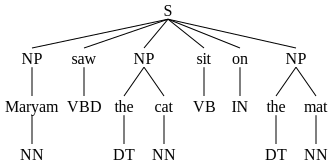

In [37]:
G2.parse(phrase)

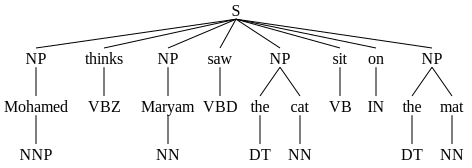

In [38]:
G2.parse(phrase2)

In [46]:
#2eme methode Spacy
import spacy
nlp = spacy.load("en_core_web_sm")
from spacy import displacy

phrase = nlp(u"Maryam saw the cat sit on the mat")
phrase2 = nlp(u"Mohamed thinks Maryam saw the cat sit on the mat")
displacy.render(phrase, style="dep",jupyter=True)

In [41]:
doc1 = nlp(phrase)
noun_phrases1 = [chunk for chunk in doc1.noun_chunks]
noun_phrases1

[Maryam, the cat, the mat]

In [42]:
#3eme methode TextBlob
import textblob
from textblob import TextBlob

phrase="Mohamed thinks Maryam saw the cat sit on the mat"
phraseblob=TextBlob(phrase)
tagged_text=phraseblob.parse()

In [43]:
#pour meilleur affichage
import pandas as pd

data = []
for tagged_word in tagged_text.split(' '):
  word = tagged_word.split("/")
  data.append([word[0], word[1], word[2],word[3]])

df = pd.DataFrame(data, columns=['Words', 'POS', 'Parse Chunker','Deep Parsing'])
df

,Words,POS,Parse Chunker,Deep Parsing
0,Mohamed,NNP,B-NP,O
1,thinks,VBZ,B-VP,O
2,Maryam,NNP,B-NP,O
3,saw,VBD,B-VP,O
4,the,DT,B-NP,O
5,cat,NN,I-NP,O
6,sit,VB,B-VP,O
7,on,IN,B-PP,B-PNP
8,the,DT,B-NP,I-PNP
9,mat,NN,I-NP,I-PNP


In [ ]:
#4eme methode StanfordParse
from nltk.parse.stanford import StanfordParser

# Configuration des chemins vers les fichiers jar et le modèle
stanford_parser_dir = '/content/stanford-parser-full-2020-11-17/'
path_to_jar = stanford_parser_dir + "stanford-parser.jar"
path_to_models_jar = stanford_parser_dir + "stanford-parser-4.2.0-models.jar"
model_path = stanford_parser_dir + "edu/stanford/nlp/models/lexparser/englishPCFG.ser.gz"

# Initialisation du parser Stanford avec NLTK
parser = StanfordParser(
    path_to_jar=path_to_jar,
    path_to_models_jar=path_to_models_jar,
    model_path=model_path
)

sentence = "A beautiful and kind-hearted girl named Ella and her parents live happily in a large house with a few servants, until her mother falls ill and later dies."

# Parsing de la phrase
parsed_sentence = list(parser.raw_parse(sentence))

# Affichage de l'arbre syntaxique
for line in parsed_sentence:
    line.pretty_print()


In [44]:
import nltk

arbre_syntaxique = "(S (NP (DT A) (JJ beautiful) (CC and) (JJ kind-hearted) (NN girl) (VP (VBN named) (NP (NNP Ella)))) (CC and) (NP (PRP her) (NNS parents)) (VP (VBP live) (ADVP (RB happily)) (PP (IN in) (NP (DT a) (JJ large) (NN house))) (PP (IN with) (NP (DT a) (JJ few) (NNS servants)))) (. ,) (SBAR (IN until) (S (NP (PRP her) (NN mother)) (VP (VBZ falls) (ADJP (JJ ill)) (CC and) (RB later) (VBZ dies)))))"

arbre = nltk.Tree.fromstring(arbre_syntaxique)
arbre.pretty_print()

                                                                                                  S                                                                                     
                        __________________________________________________________________________|______________________________________________________________                        
                       |                            |       |                                     |                                    |                        SBAR                    
                       |                            |       |                                     |                                    |     ____________________|____                   
                       NP                           |       |                                     VP                                   |    |                         S                 
  _____________________|___________________         |       |            